In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq
from compressor import compressor11025
from fingerprinter import fingerprinter
import sounddevice as sd
%matplotlib inline
plt.rcParams['figure.figsize']=[10, 6]
plt.rcParams.update({'font.size':14})

In [41]:
### Please type here the directory of a song you want to study

directory = r'/Users/kmontocam/Documents/GitHub/tracks/Pista2.wav'
song_freq, song = wavfile.read(directory)

In [42]:
### Play song
sd.play(song, song_freq)

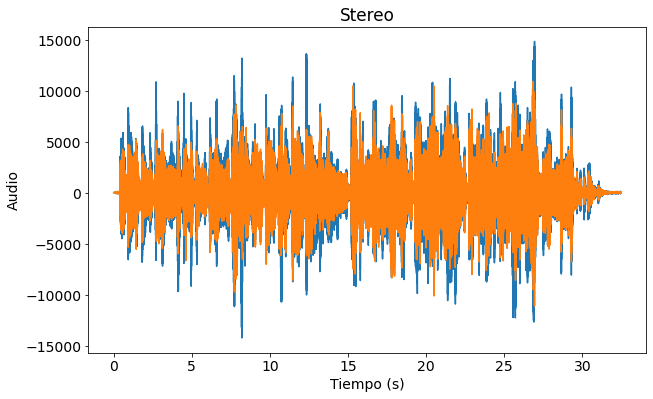

In [43]:
# Plot Stereo

seconds = np.arange(0, len(song))/song_freq

plt.plot(seconds, song)
plt.xlabel('Tiempo (s)')
plt.ylabel('Audio')
plt.title('Stereo')
plt.show()

In [44]:
song_mono = song.sum(axis = 1) / 2
# So on we'll be working with audio as a Mono Channel

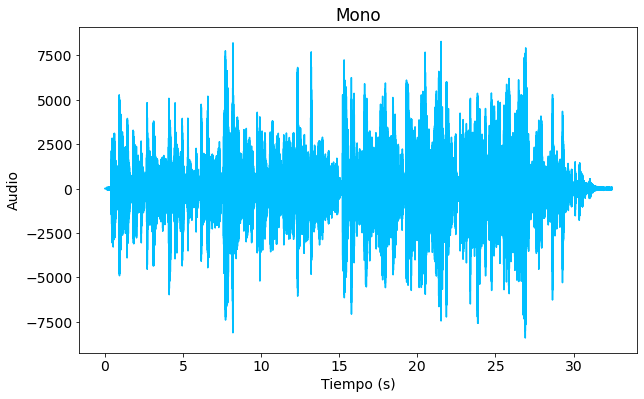

In [45]:
# Mono, having the average of both channels

song_mono = song.sum(axis = 1) / 2

plt.plot(seconds, song_mono, color = 'deepskyblue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Audio')
plt.title('Mono')
plt.show()

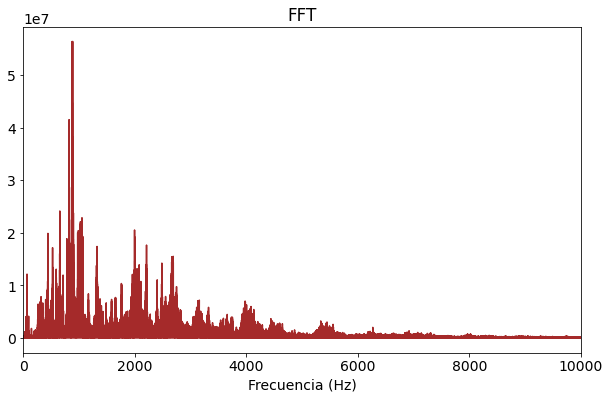

In [46]:
### Fast Fourier Transformation for song

song_fourier = fft(song_mono)
freq_fourier = fftfreq(len(song_mono), 1 / song_freq)
plt.plot(freq_fourier, np.abs(song_fourier), color = 'brown')
plt.xlim(0, 10000) # Visible hasta 10,000 Hz
plt.xlabel('Frecuencia (Hz)')
plt.title('FFT')
plt.show()

## Most relevant frequencies in song ...

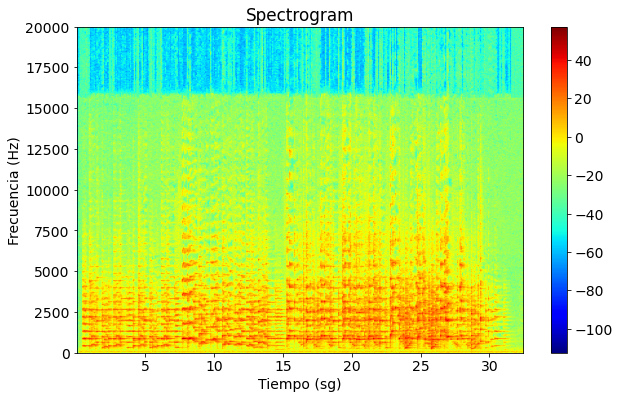

In [47]:
# Specgram of song MONO CHANNEL

plt.specgram(song_mono, NFFT = 5000, noverlap = 500, Fs = song_freq, cmap = 'jet')
plt.colorbar()
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Spectrogram')
plt.ylim(0, 20000) # Visible hasta 20,000 Hz
plt.show()

In [48]:
## Compression, turns into mono channel, eliminates frecuencias above 5 kHz and changes sample frequency to 11.05 kHz

compressed_freq, compressed_song = compressor11025(song_freq, song)

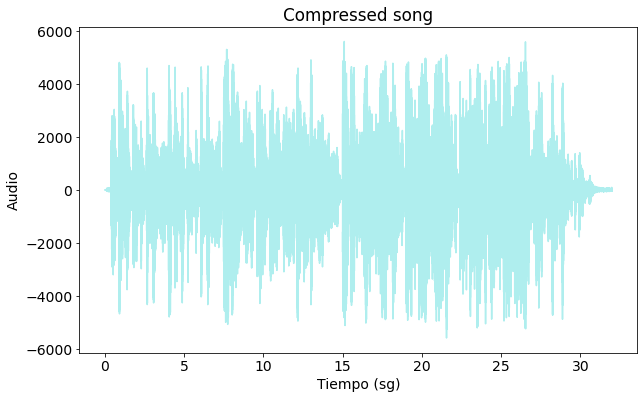

In [49]:
# Plot of compressed song

duration = round(len(compressed_song)/compressed_freq) # Seconds in track
samps = duration * compressed_freq

compressed_seconds = np.linspace(0, duration, samps)

plt.plot(compressed_seconds, compressed_song, color = 'paleturquoise')
plt.xlabel('Tiempo (sg)')
plt.ylabel('Audio')
plt.title('Compressed song')
plt.show()

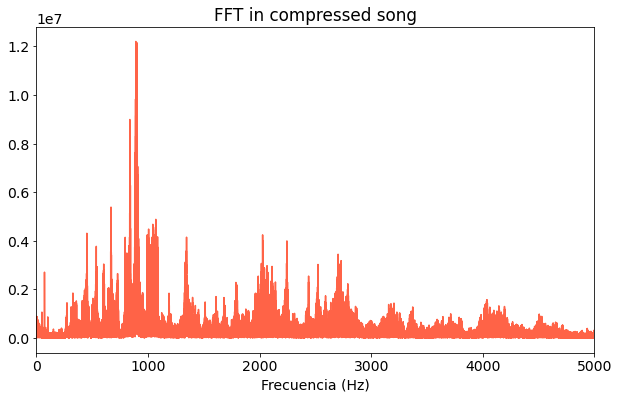

In [51]:
### Fast Fourier Transformation for song

song_fourier = fft(compressed_song)
freq_fourier = fftfreq(len(compressed_song), 1 / compressed_freq)
plt.plot(freq_fourier, np.abs(song_fourier), color = 'tomato')
plt.xlim(0, 5000) # Visible hasta 5,000 Hz
plt.xlabel('Frecuencia (Hz)')
plt.title('FFT in compressed song')
plt.show()

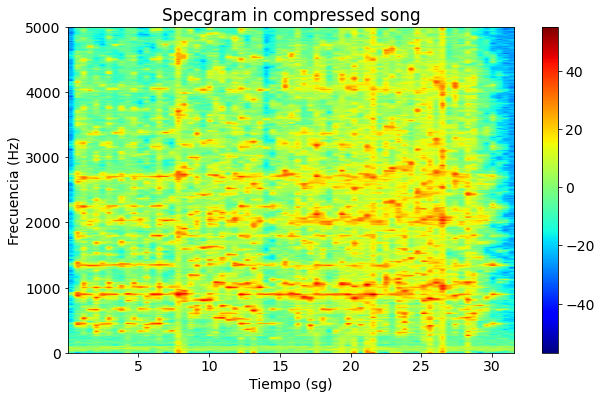

In [52]:
# Specgram of compressed song

plt.specgram(compressed_song, NFFT = 5000, noverlap = 100, Fs = compressed_freq, cmap = 'jet')
plt.colorbar()
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Specgram in compressed song')
plt.ylim(0, 5000) # Visible hasta 5,000 Hz
plt.show()

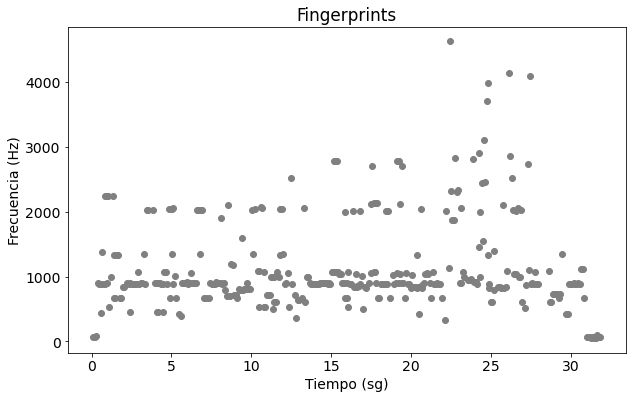

In [53]:
### Fingerprints of song

freq_times, freq_highs = fingerprinter(compressed_freq, compressed_song, 2)

plt.scatter(freq_times, freq_highs, color = 'gray')
plt.title('Fingerprints')
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

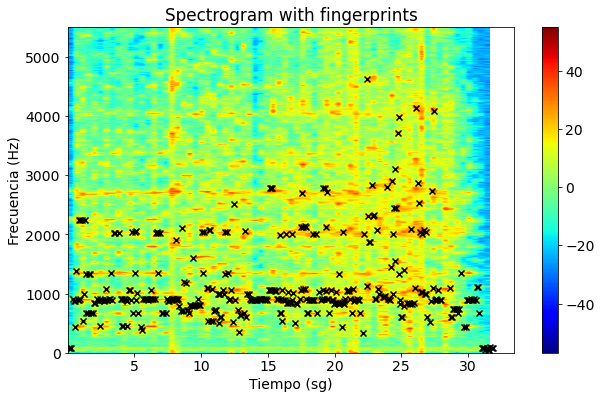

In [54]:
# Specgram of compressed song

plt.specgram(compressed_song, NFFT = 5000, noverlap = 100, Fs = compressed_freq, cmap = 'jet')
plt.colorbar()
plt.scatter(freq_times, freq_highs, marker = 'x', color = 'black')
plt.title('Spectrogram with fingerprints')
plt.xlabel('Tiempo (sg)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

In [190]:
## Record sample

fs = 11025  # Sample rate
seconds = 30  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate = fs, channels = 1)
sd.wait()  # Wait until recording is finished
# write('sampleBangarang.wav', fs, myrecording)  # Save as WAV file